In [12]:
import os
import json
import pandas as pd
strs = os.listdir('./')
df = []
cwd = os.getcwd()
for p in strs:
    if p.endswith(".json"):
        data = json.load(open(f"{cwd}/{p}","r"))
        df.extend(data)
df = pd.DataFrame(df)
lr = '1e-3'
optimizer='adam'
df['lr']=lr
df['optimizer'] =optimizer
df.head()

,width,module,t,l1,lr,optimizer
0,128,transformer.h.0.ln_1,1,0.0,1e-3,adam
1,128,transformer.h.0.attn.c_attn,1,0.0,1e-3,adam
2,128,transformer.h.0.attn.c_proj,1,0.0,1e-3,adam
3,128,transformer.h.0.attn.resid_dropout,1,0.0,1e-3,adam
4,128,transformer.h.0.attn,1,0.0,1e-3,adam


In [13]:
df[(df.t == 1) & (df.module == 'transformer.h.0.ln_1')]

,width,module,t,l1,lr,optimizer
0,128,transformer.h.0.ln_1,1,0.0,1e-3,adam
32000,256,transformer.h.0.ln_1,1,0.0,1e-3,adam
64000,512,transformer.h.0.ln_1,1,0.0,1e-3,adam
96000,1024,transformer.h.0.ln_1,1,0.0,1e-3,adam
128000,2048,transformer.h.0.ln_1,1,0.0,1e-3,adam


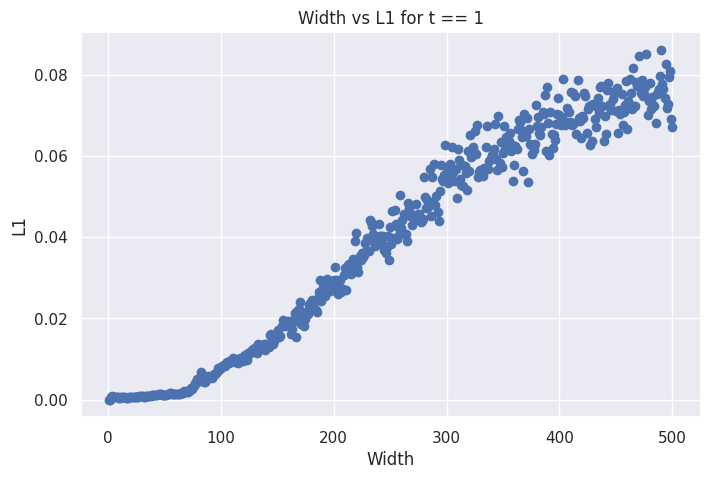

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame where t == 1
df_filtered = df[(df.t == 1) & (df.module == 'transformer.h.0.attn.c_proj')]

# Plot width vs l1
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered["width"], df_filtered["l1"])
plt.xlabel("Width")
plt.ylabel("L1")
plt.title("Width vs L1 for t == 1")
plt.grid(True)
plt.show()


/home/minrui/projects/mup-moe/mup/coord_check.py:581: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([ymin, ymax])
/home/minrui/projects/mup-moe/mup/coord_check.py:581: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([ymin, ymax])
/home/minrui/projects/mup-moe/mup/coord_check.py:581: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([ymin, ymax])


coord check plot saved to ./coor_check/mu_adam_coord.png


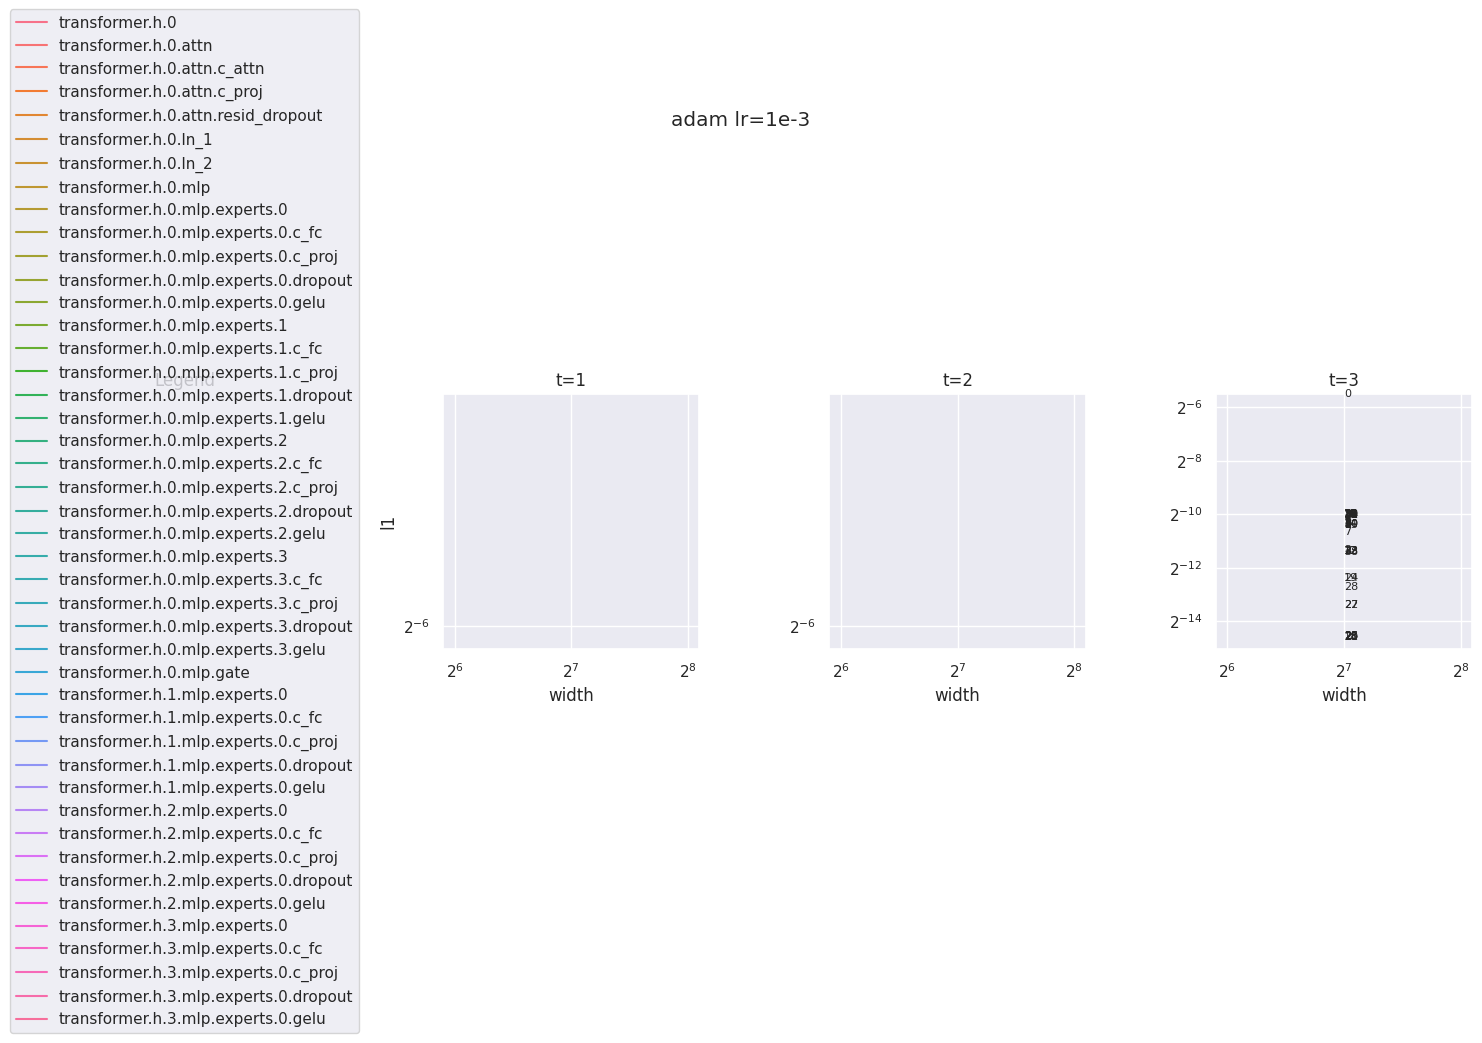

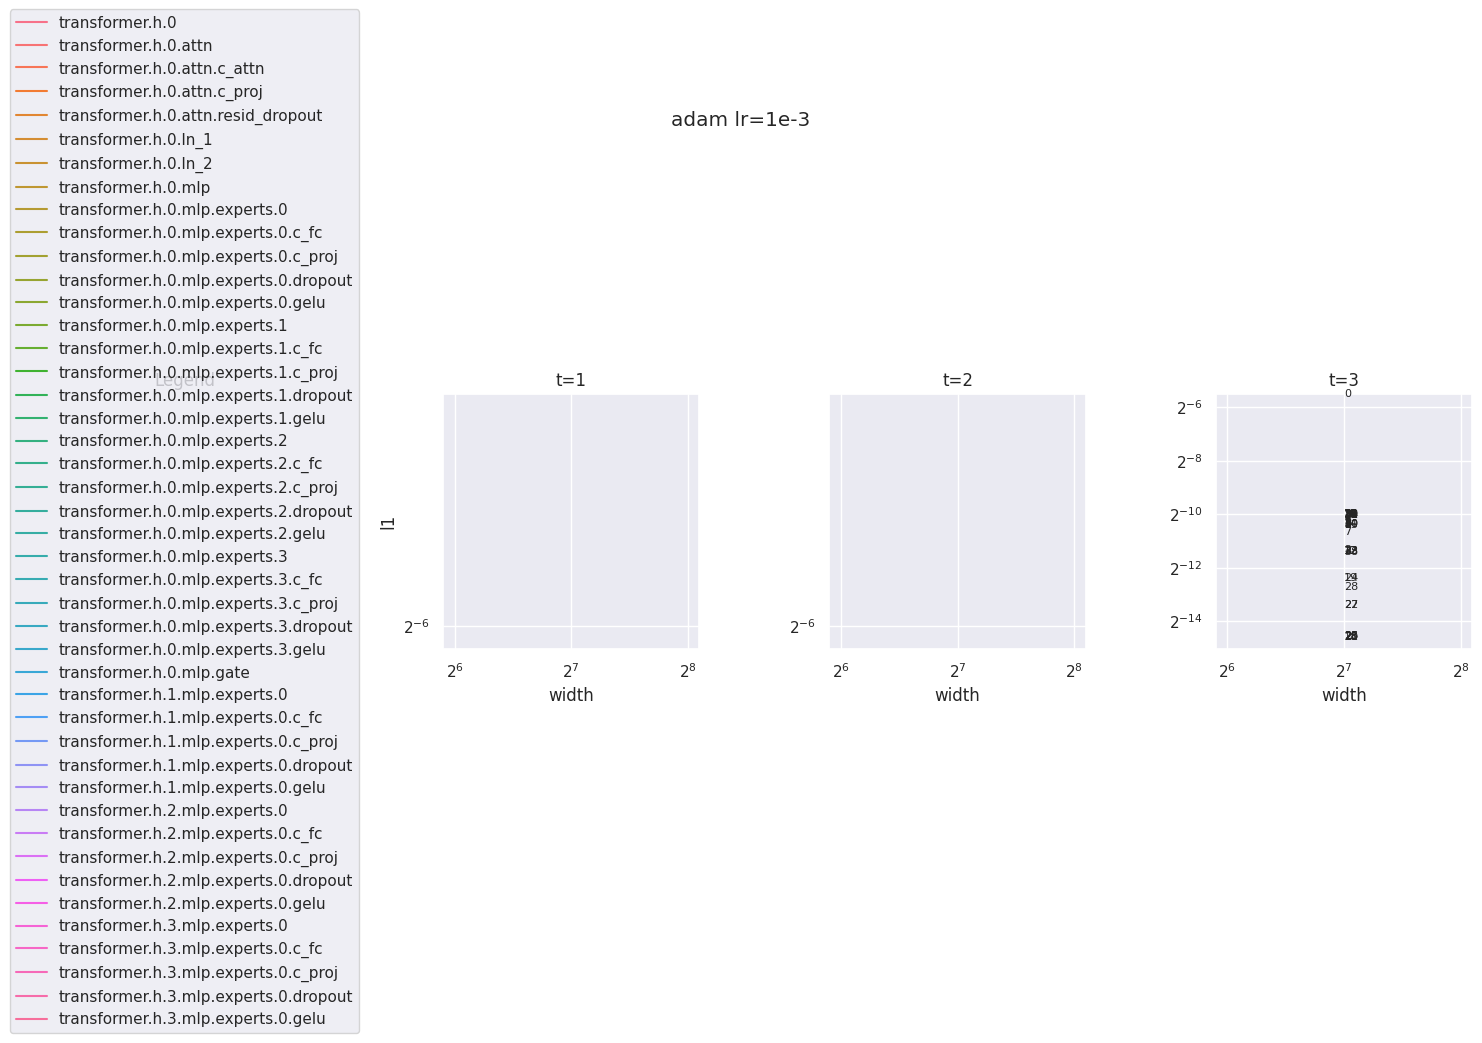

In [2]:
from mup.coord_check import get_coord_data, plot_coord_data
plot_coord_data(df, legend=True,
        save_to=os.path.join("./coor_check", 'mu_adam_coord.png'),
        suptitle=f'{optimizer} lr={lr}',
        face_color=None)